In [1]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm

import yahoo_finance as yf  
import yahoo_fin.stock_info as si

import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [2]:
#DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
TRADING_STRATEGY_FILEPATH = './Trading Strategy'

In [3]:
df = pd.read_csv(DATASET_FILEPATH, index_col = 0)
format = "%Y-%m-%d %H"
df.index = [datetime.strptime(i, format) for i in df.index]
df

,Bitcoin,Bitcoin_median,Open
2017-09-13 01:00:00,0.041773,0.066211,4128.005439
2017-09-13 02:00:00,0.051911,0.089798,4066.801167
2017-09-13 03:00:00,0.027604,0.052726,3999.225167
2017-09-13 04:00:00,0.018836,0.042056,3959.409667
2017-09-13 05:00:00,0.076571,0.109514,3995.046667
...,...,...,...
2019-01-22 18:00:00,0.030288,0.050931,3584.926897
2019-01-22 19:00:00,0.025549,0.053502,3585.858545
2019-01-22 20:00:00,0.028746,0.057698,3585.295893
2019-01-22 21:00:00,0.034695,0.073557,3579.910755


#### Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [4]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(TRADING_STRATEGY_FILEPATH)
from custom_trading_engine import customNLP
from signals import *
from strategies import *

In [ ]:
#best strategy play the opposite (with stoploss)
cash = []
for stop in range(1, 50):
    signal = Signal2(df['Bitcoin'])
    strategy = BitcoinNLPStrategy2()
    strategy.add_signal(signal)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(stop/1000)
    
    algo.run(split = True, verbose = False)
    cash.append(algo.cash)
#plt.plot(list(algo.metrics['Portfolio Marked']))

In [ ]:
plt.plot(cash)

In [ ]:
np.min(df['Bitcoin'].values)

In [20]:
signal = Signal2(df['Bitcoin'])
strategy = BitcoinNLPStrategy2()
strategy.add_signal(signal)
algo = customNLP(100000, df['Open'], strategy)
#algo.set_stoploss(0.01)

algo.run(split = True)

./Trading Strategy\signals.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return -10000 * (self.data[datetime] - mean) / stdv


selling  10000.000000000005  BTC at  4066.801166666666  $
closing  -10000.000000000005  BTC at  3999.2251666666666  $
buying  12865.729429336257  BTC at  3999.2251666666666  $
closing  12865.729429336257  BTC at  3995.046666666667  $
selling  16499.72438064325  BTC at  3995.046666666667  $
closing  -16499.72438064325  BTC at  4005.1322641509432  $
selling  6995.407217255767  BTC at  4005.1322641509432  $
closing  -6995.407217255767  BTC at  3982.99  $
selling  13116.624923094252  BTC at  3982.99  $
closing  -13116.624923094252  BTC at  3969.537118644068  $
buying  1962.886075368145  BTC at  3969.537118644068  $
closing  1962.886075368145  BTC at  3839.3781666666655  $
buying  21866.048244539354  BTC at  3839.3781666666655  $
closing  21866.048244539354  BTC at  3833.9163333333327  $
buying  3574.264057063736  BTC at  3833.9163333333327  $
closing  3574.264057063736  BTC at  3868.011  $
buying  1977.208817902875  BTC at  3868.011  $
closing  1977.208817902875  BTC at  3794.985666666667 

closing  -4620.688196128827  BTC at  6073.152166666667  $
selling  16527.91644767631  BTC at  6073.152166666667  $
closing  -16527.91644767631  BTC at  6094.0425  $
buying  9342.961632061251  BTC at  6094.0425  $
closing  9342.961632061251  BTC at  6104.586166666664  $
buying  4529.41638681396  BTC at  6104.586166666664  $
closing  4529.41638681396  BTC at  6139.857000000002  $
selling  10401.049879086624  BTC at  6139.857000000002  $
closing  -10401.049879086624  BTC at  6146.445166666667  $
selling  16247.534364567471  BTC at  6146.445166666667  $
closing  -16247.534364567471  BTC at  5995.315333333333  $
buying  12402.209173310473  BTC at  5995.315333333333  $
closing  12402.209173310473  BTC at  6008.0275  $
buying  890.5178992519964  BTC at  6008.0275  $
closing  890.5178992519964  BTC at  6032.384666666667  $
buying  2264.6736766528898  BTC at  6032.384666666667  $
closing  2264.6736766528898  BTC at  6083.566833333333  $
selling  7698.398820568131  BTC at  6083.566833333333  $
c

closing  -13443.872261290458  BTC at  16208.816666666668  $
selling  2985.625491935023  BTC at  16208.816666666668  $
closing  -2985.625491935023  BTC at  16626.591186440677  $
buying  10352.920799830223  BTC at  16626.591186440677  $
closing  10352.920799830223  BTC at  16482.85159090909  $
buying  16838.080220613847  BTC at  16482.85159090909  $
closing  16838.080220613847  BTC at  16442.60816666667  $
buying  3570.6382851956737  BTC at  16442.60816666667  $
closing  3570.6382851956737  BTC at  16506.645333333334  $
buying  16502.934593527738  BTC at  16506.645333333334  $
closing  16502.934593527738  BTC at  16639.402833333334  $
buying  46.119056383270824  BTC at  16639.402833333334  $
closing  46.119056383270824  BTC at  16577.566333333332  $
buying  7184.576121212849  BTC at  16577.566333333332  $
closing  7184.576121212849  BTC at  16389.246833333335  $
selling  3584.406745326622  BTC at  16389.246833333335  $
closing  -3584.406745326622  BTC at  16200.029166666667  $
buying  27

selling  9999.999999999996  BTC at  8524.042833333333  $
closing  -9999.999999999996  BTC at  8587.785166666667  $
buying  7019.618411748037  BTC at  8587.785166666667  $
closing  7019.618411748037  BTC at  8538.0205  $
selling  15118.014363144759  BTC at  8538.0205  $
closing  -15118.014363144759  BTC at  8454.195423728812  $
selling  962.1662694200596  BTC at  8454.195423728812  $
closing  -962.1662694200596  BTC at  8494.378983050849  $
selling  12432.985787819016  BTC at  8494.378983050849  $
closing  -12432.985787819016  BTC at  8468.5855  $
selling  1895.3933008396773  BTC at  8468.5855  $
closing  -1895.3933008396773  BTC at  8387.483559322032  $
buying  1430.3747813229097  BTC at  8387.483559322032  $
closing  1430.3747813229097  BTC at  8405.656101694916  $
buying  18613.964254156865  BTC at  8405.656101694916  $
closing  18613.964254156865  BTC at  8469.612372881356  $
buying  5969.349522283227  BTC at  8469.612372881356  $
closing  5969.349522283227  BTC at  8510.13333333333

closing  12339.023560639322  BTC at  8600.509499999998  $
selling  4626.397277117775  BTC at  8600.509499999998  $
closing  -4626.397277117775  BTC at  8636.046999999999  $
buying  795.0557925175298  BTC at  8636.046999999999  $
closing  795.0557925175298  BTC at  8540.133999999998  $
buying  5259.016410365665  BTC at  8540.133999999998  $
closing  5259.016410365665  BTC at  8406.316  $
buying  1048.5153511149842  BTC at  8406.316  $
closing  1048.5153511149842  BTC at  8427.8875  $
buying  7633.363702845269  BTC at  8427.8875  $
closing  7633.363702845269  BTC at  8434.571333333333  $
buying  2052.9953958209826  BTC at  8434.571333333333  $
closing  2052.9953958209826  BTC at  8434.571333333333  $
selling  10000.000000000005  BTC at  8403.687833333332  $
closing  -10000.000000000005  BTC at  8426.385166666665  $
buying  11749.207066028388  BTC at  8426.385166666665  $
closing  11749.207066028388  BTC at  8418.925333333334  $
selling  10468.801980691786  BTC at  8418.925333333334  $
cl

closing  14608.652327775964  BTC at  7641.51966101695  $
buying  8459.950218380103  BTC at  7641.51966101695  $
closing  8459.950218380103  BTC at  7637.092372881357  $
buying  570.6776615202322  BTC at  7637.092372881357  $
closing  570.6776615202322  BTC at  7644.307586206896  $
buying  2115.792791948708  BTC at  7644.307586206896  $
closing  2115.792791948708  BTC at  7645.51224137931  $
buying  10661.038554440272  BTC at  7645.51224137931  $
closing  10661.038554440272  BTC at  7654.310677966103  $
buying  4259.548896760683  BTC at  7654.310677966103  $
closing  4259.548896760683  BTC at  7628.621166666667  $
selling  2714.5119735574444  BTC at  7628.621166666667  $
closing  -2714.5119735574444  BTC at  7628.621166666667  $
buying  10000.0  BTC at  6579.109661016949  $
closing  10000.0  BTC at  6602.740833333333  $
buying  2613.886663633174  BTC at  6602.740833333333  $
closing  2613.886663633174  BTC at  6582.2815  $
selling  3835.1713251228284  BTC at  6582.2815  $
closing  -3835

closing  -8420.892116487299  BTC at  6734.738166666667  $
selling  14284.111882812864  BTC at  6734.738166666667  $
closing  -14284.111882812864  BTC at  6749.668333333334  $
selling  8832.399262883395  BTC at  6749.668333333334  $
closing  -8832.399262883395  BTC at  6897.144499999999  $
buying  3040.8840453112675  BTC at  6897.144499999999  $
closing  3040.8840453112675  BTC at  7353.899999999998  $
selling  18157.577376726193  BTC at  7353.899999999998  $
closing  -18157.577376726193  BTC at  7338.1495  $
selling  5248.59718402515  BTC at  7338.1495  $
closing  -5248.59718402515  BTC at  7351.493499999999  $
buying  16157.643625380815  BTC at  7351.493499999999  $
closing  16157.643625380815  BTC at  7348.7603333333345  $
selling  27312.66190006302  BTC at  7348.7603333333345  $
closing  -27312.66190006302  BTC at  7319.355  $
selling  11436.926209361916  BTC at  7319.355  $
closing  -11436.926209361916  BTC at  7319.355  $
selling  10000.0  BTC at  7358.476333333334  $
closing  -10

closing  -3145.903147237823  BTC at  6085.403499999999  $
selling  10860.450636525049  BTC at  6085.403499999999  $
closing  -10860.450636525049  BTC at  6029.684166666665  $
selling  19921.5176548851  BTC at  6029.684166666665  $
closing  -19921.5176548851  BTC at  6022.943166666666  $
buying  1891.8757759365863  BTC at  6022.943166666666  $
closing  1891.8757759365863  BTC at  6048.96724137931  $
buying  5296.69714150341  BTC at  6048.96724137931  $
closing  5296.69714150341  BTC at  6038.818499999999  $
buying  12690.737979795118  BTC at  6038.818499999999  $
closing  12690.737979795118  BTC at  6096.177  $
buying  7821.684422134087  BTC at  6096.177  $
closing  7821.684422134087  BTC at  6078.1303333333335  $
selling  12150.946006971557  BTC at  6078.1303333333335  $
closing  -12150.946006971557  BTC at  6099.815423728814  $
buying  6437.545485760452  BTC at  6099.815423728814  $
closing  6437.545485760452  BTC at  6120.369999999999  $
selling  6947.8132803528015  BTC at  6120.3699

closing  -7583.402061055619  BTC at  6415.4323214285705  $
selling  19962.301874291185  BTC at  6415.4323214285705  $
closing  -19962.301874291185  BTC at  6439.071454545455  $
buying  9999.999999999807  BTC at  6444.450487804877  $
closing  9999.999999999807  BTC at  6456.1895  $
buying  2863.0651396938806  BTC at  6456.1895  $
closing  2863.0651396938806  BTC at  6448.34574468085  $
buying  11315.201679341419  BTC at  6448.34574468085  $
closing  11315.201679341419  BTC at  6446.695106382977  $
buying  19123.034198050453  BTC at  6446.695106382977  $
closing  19123.034198050453  BTC at  6443.3812727272725  $
selling  9902.13512240174  BTC at  6443.3812727272725  $
closing  -9902.13512240174  BTC at  6434.660545454544  $
buying  19273.63497269854  BTC at  6434.660545454544  $
closing  19273.63497269854  BTC at  6443.903469387756  $
selling  1582.7158666063624  BTC at  6443.903469387756  $
closing  -1582.7158666063624  BTC at  6438.257636363637  $
selling  5568.488433331477  BTC at  64

closing  8227.793056063723  BTC at  3766.664137931035  $
buying  2060.1352671837326  BTC at  3766.664137931035  $
closing  2060.1352671837326  BTC at  3814.596551724138  $
selling  14615.198815067557  BTC at  3814.596551724138  $
closing  -14615.198815067557  BTC at  3826.724509803921  $
selling  8727.077607583606  BTC at  3826.724509803921  $
closing  -8727.077607583606  BTC at  3827.633333333334  $
selling  13522.408789602081  BTC at  3827.633333333334  $
closing  -13522.408789602081  BTC at  3827.633333333334  $
selling  9999.999999999993  BTC at  3522.10111111111  $
closing  -9999.999999999993  BTC at  3524.652777777778  $
buying  13955.32501052905  BTC at  3524.652777777778  $
closing  13955.32501052905  BTC at  3533.44387755102  $
selling  3753.997952329534  BTC at  3533.44387755102  $
closing  -3753.997952329534  BTC at  3538.7280392156863  $
buying  6288.322729243095  BTC at  3538.7280392156863  $
closing  6288.322729243095  BTC at  3542.57  $
selling  17109.04988520173  BTC at

In [ ]:
# signal = RandomSignal()
# strategy = BitcoinBNHStrategy()
# strategy.add_signal(signal)
# algo = customNLP(100000, df['Open'], strategy)
# #algo.set_stoploss(0.01)
# algo.run(split = True)

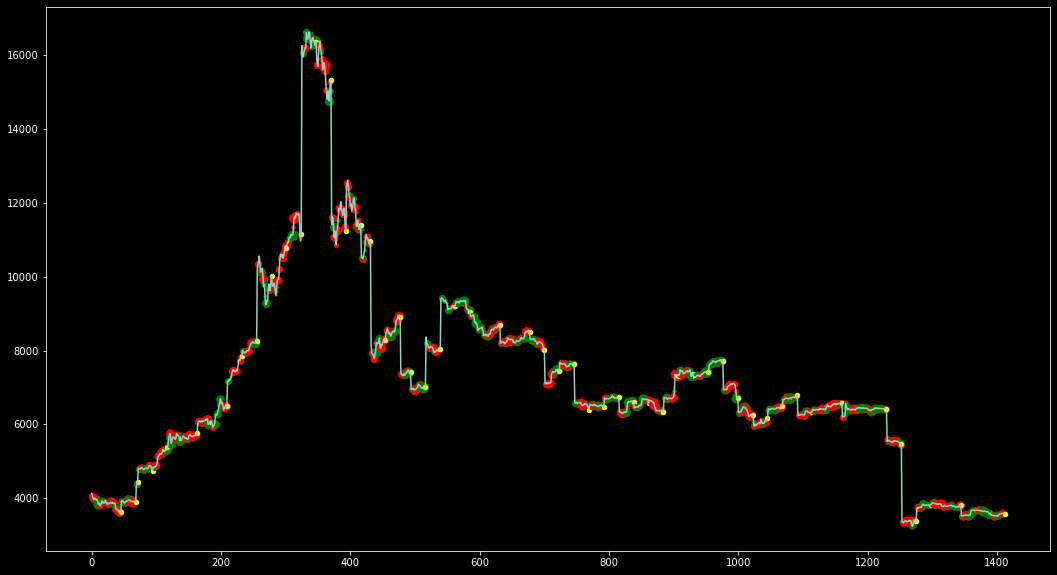

In [10]:
algo.plot()

In [16]:
algo.cash

108919.1362326431

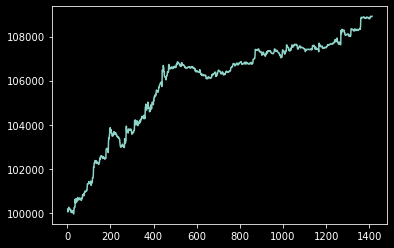

In [17]:
plt.plot(list(algo.metrics['Portfolio Marked']))

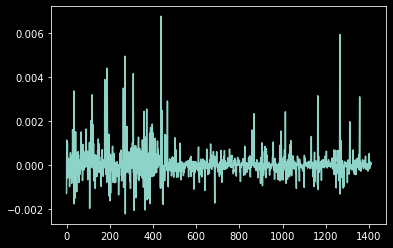

In [18]:
returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
plt.plot(returns)

In [19]:
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

8.615340336168614

In [ ]:
x = pd.DataFrame(algo.metrics['Position USD'])

In [ ]:
x = x.dropna()
x[x['Position USD']!=0].index.size

##### Generate Random Strategies

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

### Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)